### Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:
- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

##### Выполните следующие шаги:
1. Скачайте файл с предложениями (sentences.txt).


2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().


3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.


4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.


5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.


6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.


7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
  
  
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.   
___

In [1]:
import scipy.spatial.distance
import re

In [2]:
file_list = list()

with open("sentences.txt") as file:
    for line in file.readlines():
        file_list.append([x for x in re.split('[^a-z]', line.lower()) if x])

n = len(file_list)
# print(file_list)

___

4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [3]:
words_list = list()
unique_words = dict()
some_set = set()
index = 0

for line in file_list:
    for word in line:
        if word not in some_set:
            some_set.add(word)
            words_list.append(word)
            unique_words[index] = word
            index += 1
    
d = index
# print(words_list, index, len(words_list), sep="\n")
# print(unique_words)

___

5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [4]:
matrix = [[0] * d for _ in range(n)]
# print(len(matrix), len(matrix[0]))

for row in range(n):
    for col in range(d):
        matrix[row][col] = file_list[row].count(unique_words[col])


___

6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [13]:
result_list = list()
index = 0
for line in matrix:
    cos_length = scipy.spatial.distance.cosine(matrix[0], line)
    result_list.append((cos_length, index))
    index += 1
result_list.sort(key=lambda x: x[0])

print(result_list[1][1], result_list[2][1])

result_list

6 4


[(0.0, 0),
 (0.7327387580875756, 6),
 (0.7770887149698589, 4),
 (0.8250364469440588, 21),
 (0.8328165362273942, 10),
 (0.8396432548525454, 12),
 (0.8406361854220809, 16),
 (0.8427572744917122, 20),
 (0.8644738145642124, 2),
 (0.8703592552895671, 13),
 (0.8740118423302576, 14),
 (0.8804771390665607, 11),
 (0.8842724875284311, 8),
 (0.8885443574849294, 19),
 (0.8951715163278082, 3),
 (0.9055088817476932, 9),
 (0.9258750683338899, 7),
 (0.9402385695332803, 5),
 (0.9442721787424647, 15),
 (0.9442721787424647, 18),
 (0.9527544408738466, 1),
 (0.956644501523794, 17)]

___

### Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:
### $$ f(x) = \sin \left( \frac{x}{ 5} \right) \cdot e^{\frac{x}{10}} + 5 \cdot e^{\frac{-x }{2}} $$

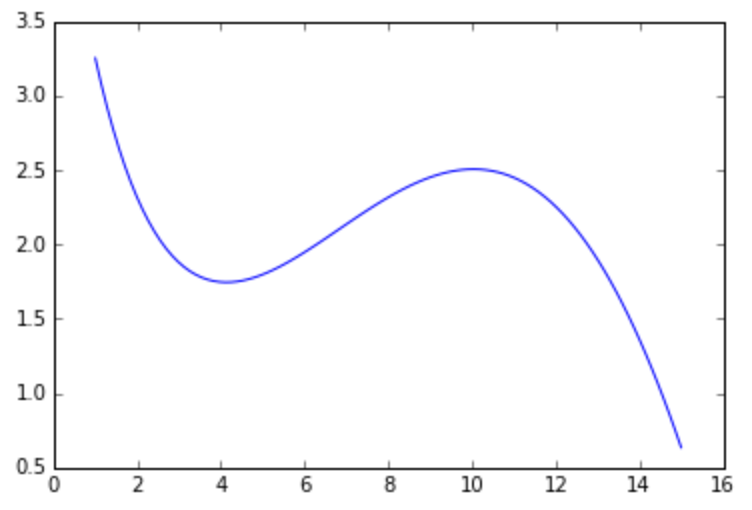

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $ w_0 + w_1 x + w_2 x^2 + ... + w_n x^n $ ) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $ w_0, ... w_n $ можно определить из следующей системы линейных уравнений:

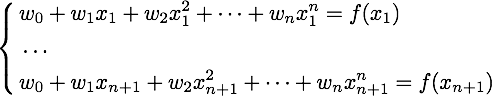

где через $ x_1, ..., x_n, x_{n+1} $ обозначены точки, через которые проходит многочлен, а через $ f(x_1), ..., f(x_n), f(x_{n+1} $) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.
1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?


2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: $ w_0, w_1, w_2, w_3 $) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

___


#### 1. 
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [6]:
import scipy as sp
import numpy as np


def func(x):
    return sp.sin(x / 5) * sp.exp(x / 10) + 5 * sp.exp(-x / 2)    

In [7]:
def solve_func_by_poly(x_list, func):
    dim = len(x_list)
    x_vector = np.array(x_list).reshape(dim, 1)
    y_vector = np.array(func(x_vector))
    x_matrix = x_vector ** np.arange(dim)
    return sp.linalg.solve(x_matrix, y_vector)

In [8]:
def result_func(c, x):
    sum = 0
    for i in range(len(c)):
        sum += x ** i * c[i]
    return sum

In [9]:
def make_beaty(x_tuple, x):
    dim = len(x_tuple)
    result = solve_func_by_poly(x_tuple, func).reshape(1, dim)[0]
    plt.plot(x, result_func(result, x))
    plt.plot(x, func(x))
    plt.grid(True) #Сетка
    plt.show()
    return result

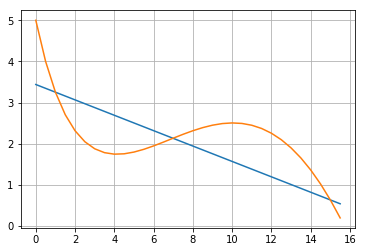

array([ 3.43914511, -0.18692825])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x_work = [1, 15]
x = np.arange(0, 16, 0.5)

make_beaty(x_work, x)

2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

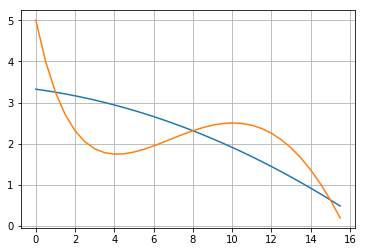

array([ 3.32512949, -0.06531159, -0.00760104])

In [11]:
x_values = (1, 8, 15)
x = np.arange(0, 16, 0.5)

make_beaty(x_values, x)

3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке:$ w_0, w_1, w_2, w_3$) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

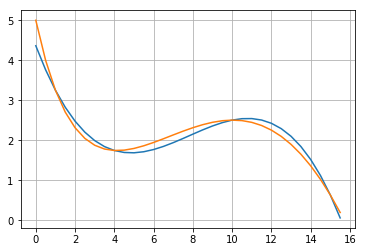

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [12]:
x_values = (1, 4, 10, 15)
x = np.arange(0, 16, 0.5)

make_beaty(x_values, x)

#### Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html


Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files


Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html